# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('avocado.csv')
dataset.shape

(18249, 14)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Drop the first colum "Unnamed"

In [5]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory analysis

Scatter plot

The correlation matrix:


Text(0.5, 1.0, 'Average price')

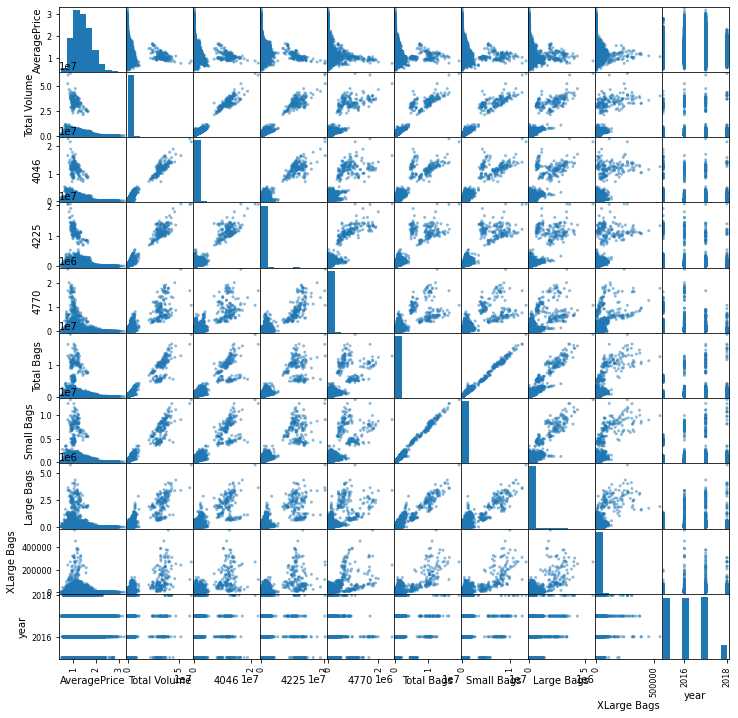

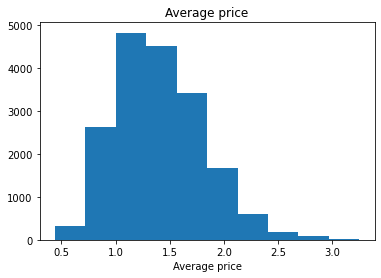

In [6]:
# Scatter plot of the data
from pandas.plotting import scatter_matrix

scatter_matrix(dataset,figsize = (12,12))
print('The correlation matrix:')
corr_mtx = dataset.corr()
corr_mtx.round(2)

plt.figure()
dataset_array = dataset.to_numpy()
price = dataset_array[:,1]
plt.hist(price)
plt.xlabel('Average price')
plt.title('Average price')

In [7]:
corr_mtx['AveragePrice'].abs().sort_values(ascending = False)

AveragePrice    1.000000
4046            0.208317
Total Volume    0.192752
4770            0.179446
Total Bags      0.177088
Small Bags      0.174730
Large Bags      0.172940
4225            0.172928
XLarge Bags     0.117592
year            0.093197
Name: AveragePrice, dtype: float64

Averaged Price plot by Date

In [69]:
byDate = dataset.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=250)
byDate['AveragePrice'].plot()
plt.title('AveragePrice')
# I noticed your plot shows the month in 'Jan' and 'Jul'. I don't know how to do that so 
# I left it like this

KeyError: 'Date'

Plot by year

<AxesSubplot:xlabel='year'>

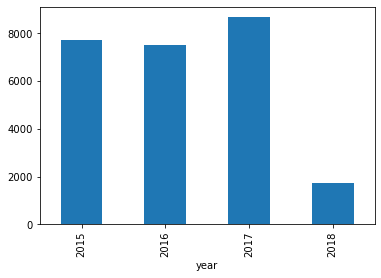

In [9]:
dataset.groupby([dataset.year])['AveragePrice'].sum().plot.bar()

Plot by region

Text(0.5, 1.0, 'Average Price According to Region')

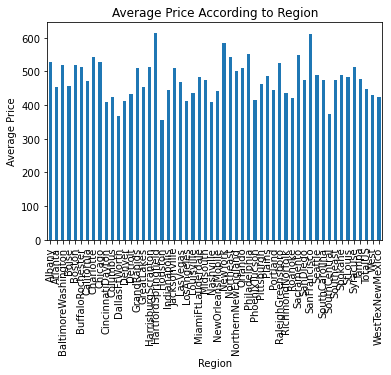

In [10]:
plt.figure(figsize=(20,6)
dataset.groupby([dataset.region])['AveragePrice'].sum().plot.bar()
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Plot by region in descending senquence

Text(0.5, 1.0, 'Average Price According to Region')

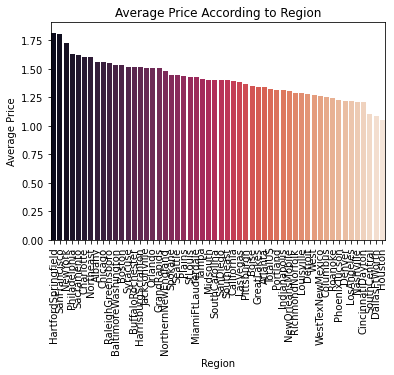

In [11]:
byRegion=dataset.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
# plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Plot of average price distribution

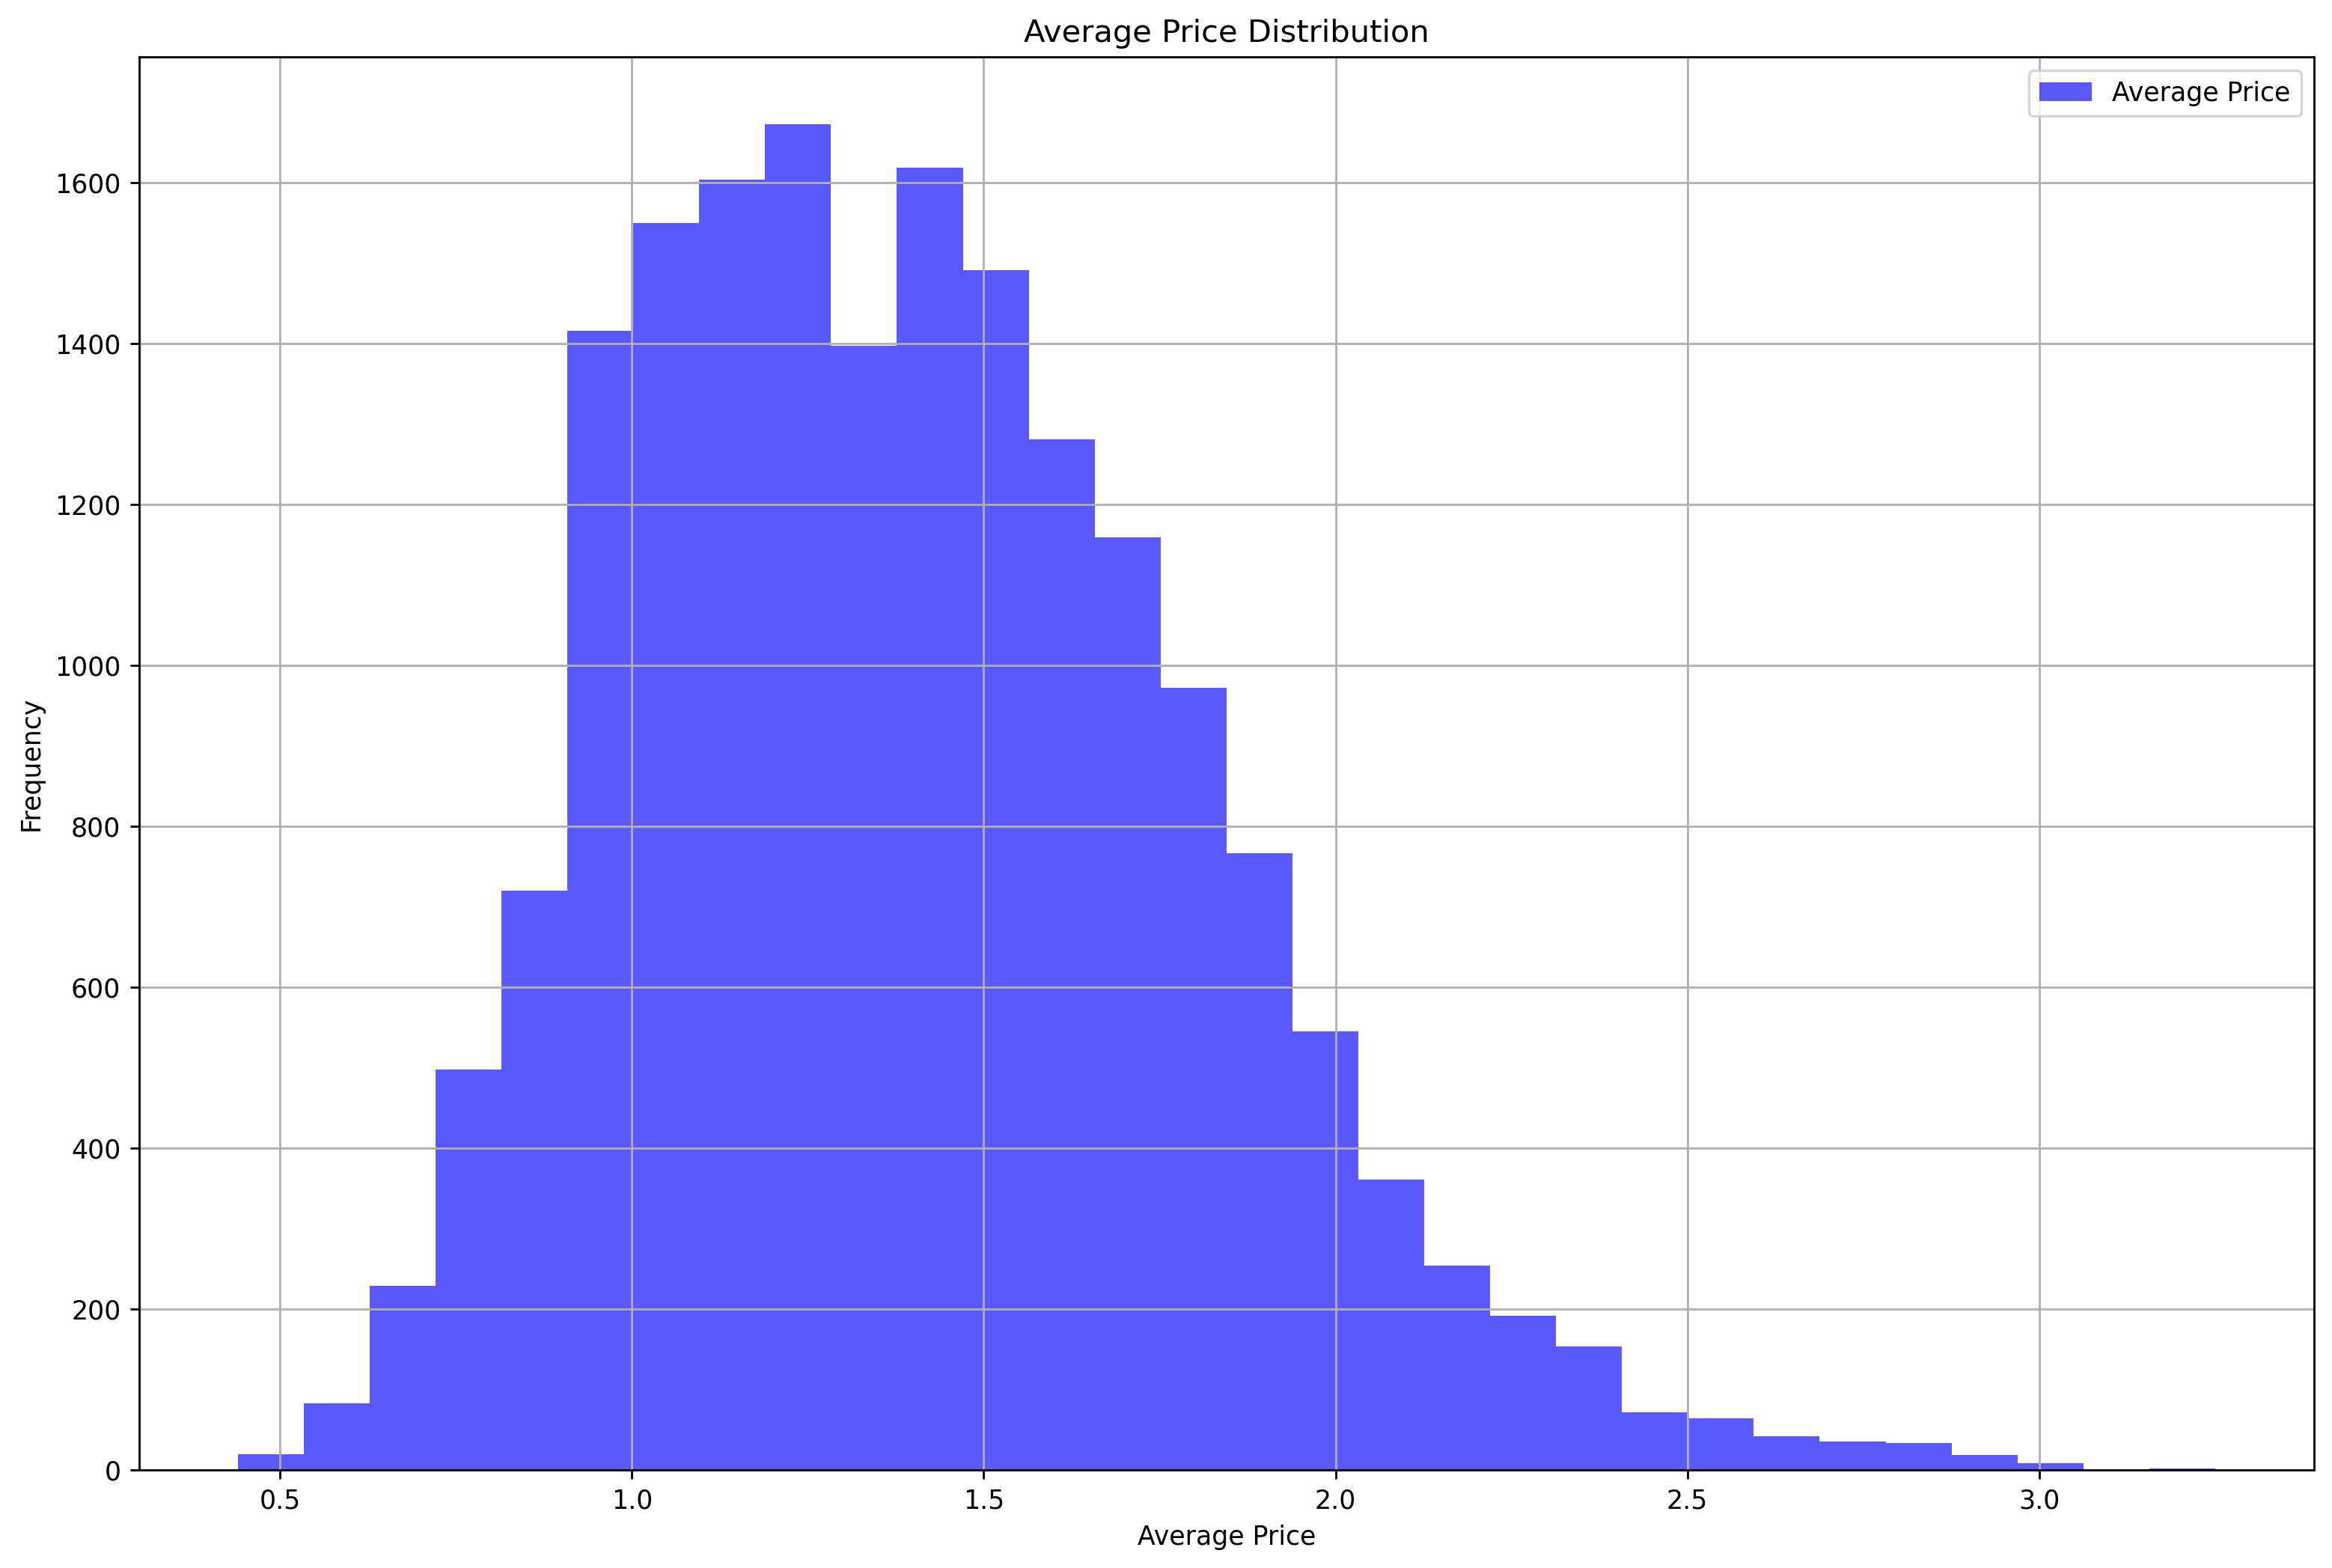

In [70]:
plt.figure(figsize=(15,10),dpi=250)
dataset["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

Factor plot

C:\Users\jxgao\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jxgao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


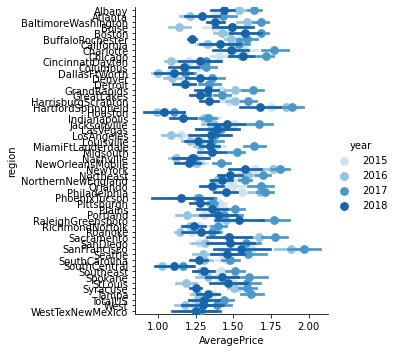

In [13]:
g = sns.factorplot('AveragePrice','region',data=dataset,
                   hue='year',
#                    size=18,
#                    aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Heat map

<AxesSubplot:>

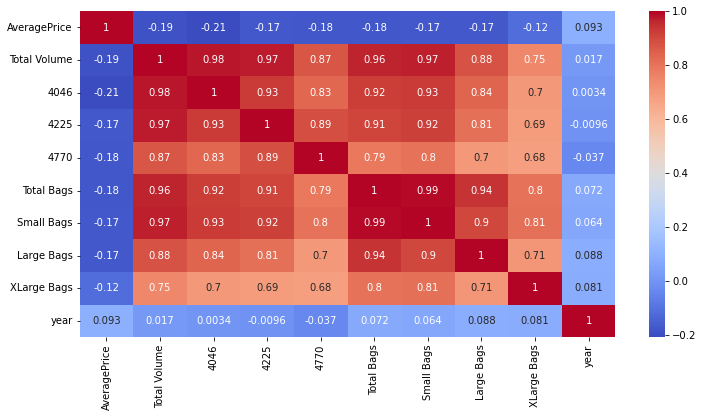

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

# Preprocessing data

In [15]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Split the Date into Month and Day

In [16]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].apply(lambda x:x.month)
dataset['Day'] = dataset['Date'].apply(lambda x:x.day)

Plot of averaged price per month

Text(0.5, 1.0, 'Average Price Per Month')

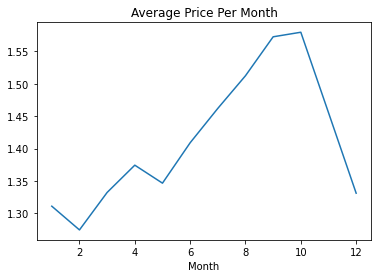

In [17]:
byMonth = dataset.groupby('Month').mean()

byMonth['AveragePrice'].plot()

plt.title('Average Price Per Month')


Plot of averaged price per day

Text(0.5, 1.0, 'Average Price Per Day')

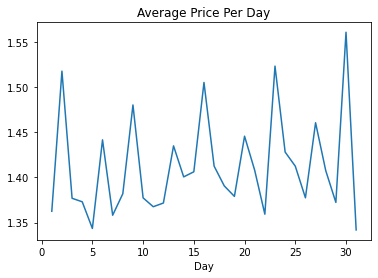

In [18]:
byDay = dataset.groupby('Day').mean()
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

## Drop the 'Date' column 

In [19]:
dataset.drop('Date', axis=1, inplace=True)
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Plot of average price over month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

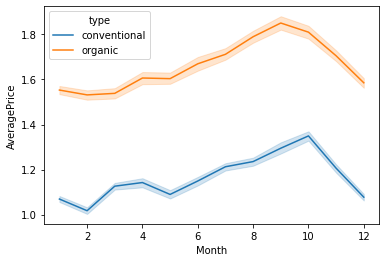

In [20]:
sns.lineplot(x='Month', y='AveragePrice', hue='type',data=dataset)
#plt.show()


Average price of different type

<AxesSubplot:xlabel='type'>

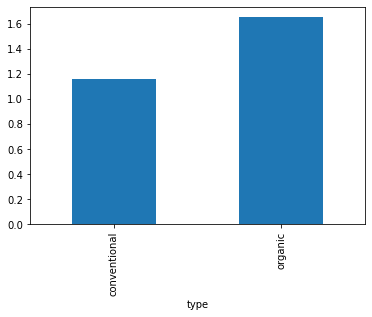

In [21]:
dataset.groupby([dataset['type']])['AveragePrice'].mean().plot.bar()

## Drop the 'region' column, convert the type into integer

In [26]:
dataset.drop('region', axis=1, inplace=True)
dataset['type'].nunique()
dataset_2bp = pd.get_dummies(dataset)
dataset_2bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AveragePrice       18249 non-null  float64
 1   Total Volume       18249 non-null  float64
 2   4046               18249 non-null  float64
 3   4225               18249 non-null  float64
 4   4770               18249 non-null  float64
 5   Total Bags         18249 non-null  float64
 6   Small Bags         18249 non-null  float64
 7   Large Bags         18249 non-null  float64
 8   XLarge Bags        18249 non-null  float64
 9   year               18249 non-null  int64  
 10  Month              18249 non-null  int64  
 11  Day                18249 non-null  int64  
 12  type_conventional  18249 non-null  uint8  
 13  type_organic       18249 non-null  uint8  
dtypes: float64(9), int64(3), uint8(2)
memory usage: 1.7 MB


# Linear Regression

In [23]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate # split data randomly into train and test subsets
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler # standarization
from sklearn import metrics

In [64]:
X=dataset_2bp.iloc[:,1:14]
y=dataset_2bp['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# print(X)

# standarization
std_trans = StandardScaler()
X_train = std_trans.fit_transform(X_train)
X_test = std_trans.transform(X_test)
X.shape, y.shape

((18249, 13), (18249,))

In [86]:
lr=LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report for linear regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
# print('F1-score', metrics.f1_score(y_test, pred_lr,zero_division=1))
# print('recall_score', metrics.recall_score(y_test, pred_lr))
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_lr))
# y_test.reshape(-1, 1)
# pred_lr.reshape(-1, 1)


X_train.shape, y_train.shape,X_test.shape, y_test.shape, pred_lr.shape
print(lr.score(X_test,pred_lr))

Model Report for linear regression
MAE: 0.23297133291646838
MSE: 0.09108802805328069
RMSE: 0.30180793238959225
CV Score: 0.8298980777475823
Coefficient of determination: 0.43
1.0


# Empirical Bayesian regression 

In the empirical Bayes approach, the parameters  𝛼  and  𝛽  are obtained by maximizing the evidence function. The empirical Bayes algorithm infers  𝛼  and  𝛽  from data, therefore, no tuning is required in this approach.

In [66]:
ebr = BayesianRidge()
ebr.fit(X_train, y_train)
pred_ebr = ebr.predict(X_test)

print("Model Report for Empirical Bayesian regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_ebr))
print('MSE:', metrics.mean_squared_error(y_test, pred_ebr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ebr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_ebr))

Model Report for Empirical Bayesian regression
MAE: 0.2330098801335983
MSE: 0.091118293601461
RMSE: 0.3018580686373333
CV Score: 0.8298980777475823
Coefficient of determination: 0.43


# Bayesian regression

In [67]:
class BayesianRegression():
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 1))

        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * X.T @ t
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y



    def _log_likelihood(self, X, t, w):
        return -0.5 * self.beta * np.square(t - X @ w).sum()

In [68]:
br = BayesianRegression(alpha=1, beta=100.)
br.fit(X_train, y_train)
pred_br = br.predict(X_test)

print("Model Report for Empirical Bayesian regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_br))
print('MSE:', metrics.mean_squared_error(y_test, pred_br))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_br)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_br))

Model Report for Empirical Bayesian regression
MAE: 1.4113258747543207
MSE: 2.08291426330554
RMSE: 1.4432304955569433
CV Score: 0.8298980777475823
Coefficient of determination: -11.96
